In [55]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import cmocean


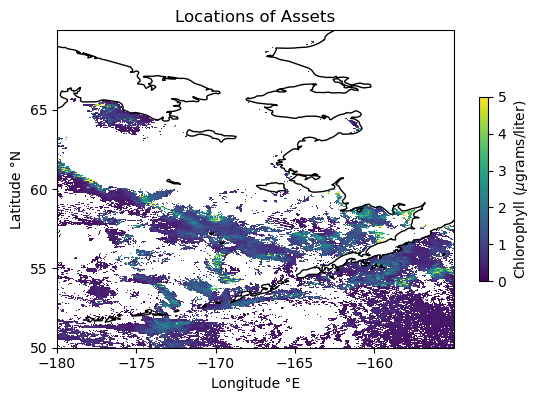

In [66]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, -155, 50, 70], crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(-180, -155, 5), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude °E')
ax.set_ylabel('Latitude °N')
ax.set_yticks(np.arange(50, 70, 5), crs=ccrs.PlateCarree())
ax.set_title('Locations of Assets')

#period 1: 5-3 to 5-11
chl_a_5_3_5_11 = netcdf_dataset('/Users/anjalishah/Desktop/EcoFOCI2024/qGIS maps/chl_ice_lag_plots/chl-a netcdfs/5-3_5-11.nc')
chl_a = chl_a_5_3_5_11.variables['chlor_a'][0,0,:,:]
lat = chl_a_5_3_5_11.variables['latitude']
lon = chl_a_5_3_5_11.variables['longitude']

gridded_chl = ax.pcolormesh(lon, lat, chl_a,cmap = 'viridis', vmin=0, vmax=5)
chl_cbar = plt.colorbar(gridded_chl, shrink=0.5)
chl_cbar.set_label('Chlorophyll (${\mu}$grams/liter)')

#add shape file from 4/30

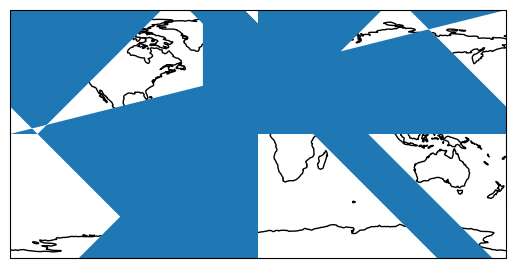

In [65]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ice_5_08 = Reader('/Users/anjalishah/Desktop/EcoFOCI2024/qGIS maps/chl_ice_lag_plots/MAISIE ice product shape files/masie_ice_r00_v01_2023_5_08_4km/masie_ice_r00_v01_2023118_4km.shp')
shape_feature = ShapelyFeature(ice_4_30.geometries(),
                               ccrs.PlateCarree())
ax.add_feature(shape_feature)